In [1]:
from pyforest import *

In [2]:
df1= pd.read_csv('train.csv')

<IPython.core.display.Javascript object>

In [3]:
df2=pd.read_csv("test.csv")

<IPython.core.display.Javascript object>

In [4]:
data=pd.concat([df1,df2])

<IPython.core.display.Javascript object>

In [5]:
data.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,01-06-2012 00:00,present,senior quality engineer,Bangalore,f,19-02-1990 00:00,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,01-09-2013 00:00,present,assistant manager,Indore,m,04-10-1989 00:00,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,01-06-2014 00:00,present,systems engineer,Chennai,f,03-08-1992 00:00,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1.1e+06,01-07-2011 00:00,present,senior software engineer,Gurgaon,m,05-12-1989 00:00,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,01-03-2014 00:00,01-03-2015 00:00,get,Manesar,m,27-02-1991 00:00,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [6]:
data.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5498 entries, 0 to 1499
Data columns (total 39 columns):
Unnamed: 0               5498 non-null object
ID                       5498 non-null int64
Salary                   5498 non-null object
DOJ                      5498 non-null object
DOL                      5498 non-null object
Designation              5498 non-null object
JobCity                  5498 non-null object
Gender                   5498 non-null object
DOB                      5498 non-null object
10percentage             5498 non-null float64
10board                  5498 non-null object
12graduation             5498 non-null int64
12percentage             5498 non-null float64
12board                  5498 non-null object
CollegeID                5498 non-null int64
CollegeTier              5498 non-null int64
Degree                   5498 non-null object
Specialization           5498 non-null object
collegeGPA               5498 non-null float64
CollegeCityID       

## Data Cleaning

In [8]:
data["Specialization"].value_counts()

electronics and communication engineering      1210
computer science & engineering                 1027
information technology                          901
computer engineering                            838
computer application                            314
electronics and electrical engineering          281
mechanical engineering                          271
electronics & telecommunications                163
electrical engineering                          108
civil engineering                                44
electronics & instrumentation eng                42
electronics and instrumentation engineering      39
information science engineering                  34
electronics engineering                          29
instrumentation and control engineering          26
biotechnology                                    20
other                                            17
applied electronics and instrumentation          16
industrial & production engineering              12
chemical eng

In [9]:
data["GraduationYear"].isnull().sum()

0

In [10]:
data["12percentage"].min()

40.0

In [11]:
data["12percentage"].max()

98.7

1) DOB can be converted into continuous data as AGE so we will convert DOB in Age column

In [12]:
data['Age']=2019-(pd.DatetimeIndex(data['DOB']).year)
data=data.drop('DOB',axis=1)

<IPython.core.display.Javascript object>

In [13]:
# make cbse as uniform thorughout column
data['10board'].replace(to_replace='central board of secondary education',value='cbse',inplace=True)
data['10board'].replace(to_replace='0',value=np.nan,inplace=True)

data['12board'].replace(to_replace='central board of secondary education',value='cbse',inplace=True)
data['12board'].replace(to_replace='0',value=np.nan,inplace=True)


# convert other all board except cbse and icse as state board
data['10board'].replace(to_replace=data['10board'][(data['10board']!='cbse') & (data['10board']!='icse') 
                                                   & (data['10board']!=np.nan)].values,value='state board',inplace=True)
# convert other all board except cbse and icse as state board
data['12board'].replace(to_replace=data['12board'][(data['12board']!='cbse') & (data['12board']!='icse')
                                                   & (data['12board']!=np.nan)].values,value='state board',inplace=True)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [14]:
data["collegeGPA"]=data[data["collegeGPA"]>1]["collegeGPA"]*9.5

In [15]:
data["collegeGPA"].min()

61.275

4) college tier

In [16]:
# Filling missing value by following logic

print(data[data['CollegeTier']==2]['10board'].value_counts(1))
#print('\n')
print(data[data['CollegeTier']==1]['10board'].value_counts(1))
print('\n')
print(data[data['CollegeTier']==2]['12board'].value_counts(1))
#print('\n')
print(data[data['CollegeTier']==1]['12board'].value_counts(1))

state board    0.599882
cbse           0.328423
icse           0.071695
Name: 10board, dtype: float64
cbse           0.636364
state board    0.285012
icse           0.078624
Name: 10board, dtype: float64


state board    0.639953
cbse           0.327637
icse           0.032410
Name: 12board, dtype: float64
cbse           0.678133
state board    0.299754
icse           0.022113
Name: 12board, dtype: float64


In [17]:
for x in data['CollegeTier'].values:
        if x==2:
            data['10board'].fillna('state board')
            data['12board'].fillna('state board')
        elif x==1:
            data['10board'].fillna('cbse')
            data['12board'].fillna('cbse')    

In [18]:
data['Domain']=data['Domain'].replace(to_replace=-1,value=0.649389715)  # data[data['Domain']!=-1]['Domain'].median()

In [19]:
data['GraduationYear']=data['GraduationYear'].replace(to_replace=0,value=2016) 
# checked manually his corresponding 12 yr of passing


We have 7 columns of different exm scores out of which each student have given only 2-3 exmas so we will make a column of marks separetly by considering the max of whatever makrs they got in each exam

In [20]:
x=list(range(0,data.shape[0]))
data["Mark1"]=x
def Max_mark(x):
    return(data[['ComputerProgramming','ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg']].iloc[x,:].max())

data["Mark"]=data['Mark1'].apply(Max_mark)

In [21]:
data=data.drop(['Mark1','ComputerProgramming','ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg'],axis=1)

There are 130 missing values so we will replace that values in Marks column by mean

In [22]:
data['Mark'].replace(to_replace=-1,value=data['Mark'].median(),inplace=True)

Specialization column has many specialization so we will keep only main major specializations by names & remaining we return them as "Other"

In [23]:
x=data.Specialization.value_counts()[0:15]
def change_sp(i):
    if i not in x.index:
        return 'Other'
    else:
        return i
        
data['Specialization']=data['Specialization'].apply(change_sp)

In [24]:
x=data.CollegeState.value_counts(1)[0:14]
def change_CS(i):
    if i not in x.index:
        return 'Other'
    else:
        return i
        
data['CollegeState']=data['CollegeState'].apply(change_CS)

In [25]:
data.head(2)

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,10percentage,10board,...,Logical,Quant,Domain,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Age,Mark
0,train,203097,420000,01-06-2012 00:00,present,senior quality engineer,Bangalore,f,84.3,state board,...,585,525,0.635979,0.9737,0.8128,0.5269,1.3549,-0.4455,29,445
1,train,579905,500000,01-09-2013 00:00,present,assistant manager,Indore,m,85.4,cbse,...,610,780,0.960603,-0.7335,0.3789,1.2396,-0.1076,0.8637,30,466


In [26]:
data.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', '10percentage', '10board', '12graduation', '12percentage',
       '12board', 'CollegeID', 'CollegeTier', 'Degree', 'Specialization',
       'collegeGPA', 'CollegeCityID', 'CollegeCityTier', 'CollegeState',
       'GraduationYear', 'English', 'Logical', 'Quant', 'Domain',
       'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience', 'Age', 'Mark'],
      dtype='object')

In [27]:
final_train=data.iloc[0:3998,:]

In [28]:
final_test=data.iloc[3998:,:]

In [29]:
print(final_train.shape,final_test.shape)

(3998, 33) (1500, 33)


In [30]:
final_train.to_csv('final_train_ttt.csv',index=False)
final_test.to_csv('final_test_tt.csv',index=False)

In [31]:
data["nueroticism"].max()

3.3525

In [32]:
data["nueroticism"].min()

-2.6430000000000002

### EDA
* Convert names in 10board columns in 3 catagories (csbe,icse,state board)

In [33]:
# make cbse as uniform thorughout column
data['10board'].replace(to_replace='central board of secondary education',value='cbse',inplace=True)
data['10board'].replace(to_replace='0',value='NA',inplace=True)

In [34]:
# convert other all board except cbse and icse as state board
data['10board'].replace(to_replace=data['10board'][(data['10board']!='cbse') & (data['10board']!='icse') & (data['10board']!='NA')].values,value='state board',inplace=True)

In [35]:
data['10board'].value_counts()

state board    3170
cbse           1931
icse            397
Name: 10board, dtype: int64

In [36]:
data['12board'].replace(to_replace='central board of secondary education',value='cbse',inplace=True)
data['12board'].replace(to_replace='0',value='NA',inplace=True)

In [37]:
# convert other all board except cbse and icse as state board
data['12board'].replace(to_replace=data['12board'][(data['12board']!='cbse') & (data['12board']!='icse') & (data['12board']!='NA')].values,value='state board',inplace=True)

In [38]:
data['12board'].value_counts()

state board    3380
cbse           1944
icse            174
Name: 12board, dtype: int64

In [39]:
data.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', '10percentage', '10board', '12graduation', '12percentage',
       '12board', 'CollegeID', 'CollegeTier', 'Degree', 'Specialization',
       'collegeGPA', 'CollegeCityID', 'CollegeCityTier', 'CollegeState',
       'GraduationYear', 'English', 'Logical', 'Quant', 'Domain',
       'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience', 'Age', 'Mark'],
      dtype='object')

In [40]:
print('The unique cities are ',len(data.CollegeCityID.unique()))

The unique cities are  1570


In [41]:
print('Students are from 26 different states ')
data.CollegeState.value_counts()

Students are from 26 different states 


Uttar Pradesh     1255
Tamil Nadu         516
Karnataka          491
Telangana          420
Maharashtra        351
Andhra Pradesh     331
West Bengal        274
Madhya Pradesh     267
Punjab             266
Orissa             246
Rajasthan          245
Haryana            243
Delhi              223
Other              208
Uttarakhand        162
Name: CollegeState, dtype: int64

In [42]:
print(data[data['CollegeTier']==2]['10board'].value_counts())
print('\n')
print(data[data['10board']=='NA']['CollegeTier'].value_counts())
print('\n')
print(data[data['CollegeTier']==2]['12board'].value_counts())
print('\n')
print(data[data['12board']=='NA']['CollegeTier'].value_counts())

state board    3054
cbse           1672
icse            365
Name: 10board, dtype: int64


Series([], Name: CollegeTier, dtype: int64)


state board    3258
cbse           1668
icse            165
Name: 12board, dtype: int64


Series([], Name: CollegeTier, dtype: int64)


**IF collegeTier is 2 then probability of its board to be state board is more**

In [43]:
data['10board'].replace(to_replace='NA',value='state board',inplace=True)
data['12board'].replace(to_replace='NA',value='state board',inplace=True)

In [44]:
print('10 Board','\n','\n',data['10board'].value_counts())
print('\n')
print('12 Board','\n','\n',data['12board'].value_counts())

10 Board 
 
 state board    3170
cbse           1931
icse            397
Name: 10board, dtype: int64


12 Board 
 
 state board    3380
cbse           1944
icse            174
Name: 12board, dtype: int64


In [45]:
data.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', '10percentage', '10board', '12graduation', '12percentage',
       '12board', 'CollegeID', 'CollegeTier', 'Degree', 'Specialization',
       'collegeGPA', 'CollegeCityID', 'CollegeCityTier', 'CollegeState',
       'GraduationYear', 'English', 'Logical', 'Quant', 'Domain',
       'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience', 'Age', 'Mark'],
      dtype='object')

In [46]:
print('The unique cities are ',len(data.CollegeCityID.unique()))

The unique cities are  1570


In [47]:
print('Students are from ', len(data.CollegeState.value_counts()), 'different states ')


Students are from  15 different states 


In [48]:
plt.figure(figsize=(15,15))
data.CollegeState.value_counts().plot(kind='bar')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 1500x1500 with 1 Axes>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

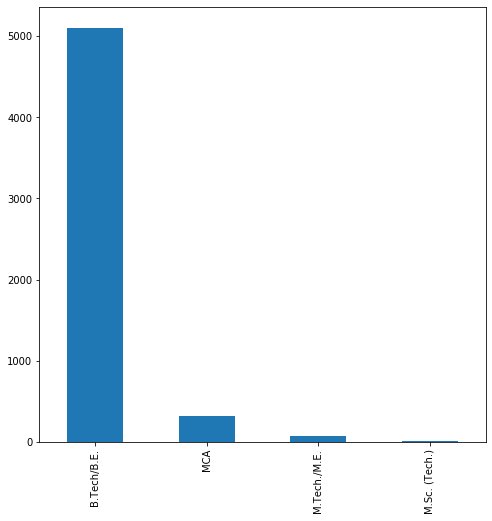

In [49]:
plt.figure(figsize=(8,8))
data.Degree.value_counts().plot(kind='bar')
plt.show()
#'Specialization'

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

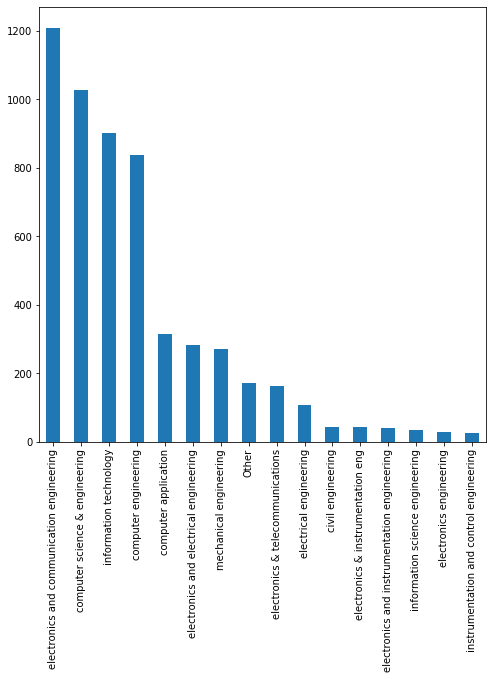

In [50]:
plt.figure(figsize=(8,8))
data.Specialization.value_counts().plot(kind='bar')
plt.show()

In [51]:
data.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', '10percentage', '10board', '12graduation', '12percentage',
       '12board', 'CollegeID', 'CollegeTier', 'Degree', 'Specialization',
       'collegeGPA', 'CollegeCityID', 'CollegeCityTier', 'CollegeState',
       'GraduationYear', 'English', 'Logical', 'Quant', 'Domain',
       'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience', 'Age', 'Mark'],
      dtype='object')

<IPython.core.display.Javascript object>

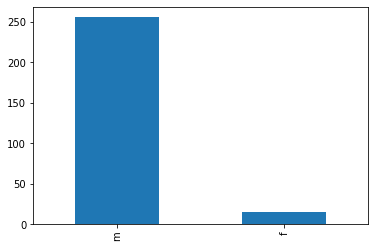

In [52]:
data[data['Specialization']=='mechanical engineering']['Gender'].value_counts().plot(kind='bar')
plt.show()

<IPython.core.display.Javascript object>

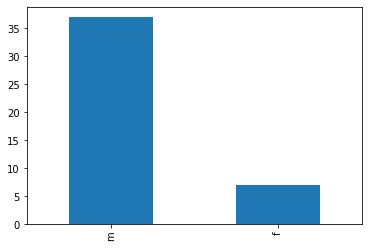

In [53]:
data[data['Specialization']=='civil engineering']['Gender'].value_counts().plot(kind='bar')
plt.show()

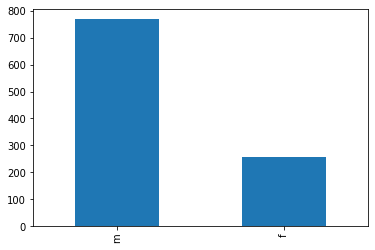

In [54]:

data[data['Specialization']=='computer science & engineering']['Gender'].value_counts().plot(kind='bar')


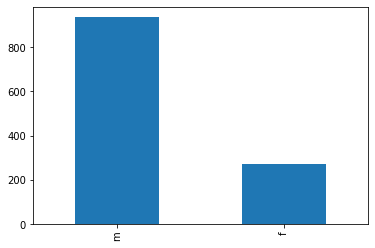

In [55]:
data[data['Specialization']=='electronics and communication engineering']['Gender'].value_counts().plot(kind='bar')
#plt.show()

In [56]:
data.Specialization.value_counts()

electronics and communication engineering      1210
computer science & engineering                 1027
information technology                          901
computer engineering                            838
computer application                            314
electronics and electrical engineering          281
mechanical engineering                          271
Other                                           171
electronics & telecommunications                163
electrical engineering                          108
civil engineering                                44
electronics & instrumentation eng                42
electronics and instrumentation engineering      39
information science engineering                  34
electronics engineering                          29
instrumentation and control engineering          26
Name: Specialization, dtype: int64

In [57]:
train=pd.read_csv('final_train.csv')
test=pd.read_csv('final_test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [58]:
train.head()

,Salary,Gender,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,...,Logical,Quant,Domain,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Age,Mark
0,420000.0,f,84.3,state board,2007,95.8,state board,1141,2,B.Tech/B.E.,...,585,525,0.635979,0.9737,0.8128,0.5269,1.35490,-0.4455,29,445
1,500000.0,m,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,...,610,780,0.960603,-0.7335,0.3789,1.2396,-0.10760,0.8637,30,466
2,325000.0,f,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,...,545,370,0.450877,0.2718,1.7109,0.1637,-0.86820,0.6721,27,395
3,1100000.0,m,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,...,585,625,0.974396,0.0464,0.3448,-0.3440,-0.40780,-0.9194,30,615
4,200000.0,m,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,...,625,465,0.124502,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,28,233


In [59]:
test.head()

,Salary,Gender,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,...,Logical,Quant,Domain,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Age,Mark
0,?,m,75.0,cbse,2009,74.0,cbse,13478,2,B.Tech/B.E.,...,460,620,0.229482,0.2718,-0.2871,0.4711,-0.7415,-0.4776,27,385
1,?,m,83.0,state board,2009,75.0,state board,65,2,B.Tech/B.E.,...,605,655,0.080055,0.7027,0.2124,1.2396,-0.8682,1.0554,27,545
2,?,f,85.2,cbse,2010,91.4,state board,3505,2,B.Tech/B.E.,...,690,655,0.990009,0.1282,1.0449,-0.6048,-1.6289,-0.8608,27,655
3,?,f,81.8,state board,2010,80.8,state board,3931,2,B.Tech/B.E.,...,455,415,0.842248,0.4155,1.0449,-0.6048,1.5404,1.0554,29,535
4,?,m,78.0,cbse,2007,78.0,cbse,7564,2,B.Tech/B.E.,...,395,435,0.864685,0.0464,0.0328,-0.0537,0.0623,0.6603,29,525


In [60]:
num_data=pd.get_dummies(train)
num_data.head()

<IPython.core.display.Javascript object>

,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,GraduationYear,...,CollegeState_Maharashtra,CollegeState_Orissa,CollegeState_Other,CollegeState_Punjab,CollegeState_Rajasthan,CollegeState_Tamil Nadu,CollegeState_Telangana,CollegeState_Uttar Pradesh,CollegeState_Uttarakhand,CollegeState_West Bengal
0,420000.0,84.3,2007,95.8,1141,2,78.00,1141,0,2011,...,0,0,0,0,0,0,0,0,0,0
1,500000.0,85.4,2007,85.0,5807,2,70.06,5807,0,2012,...,0,0,0,0,0,0,0,0,0,0
2,325000.0,85.0,2010,68.2,64,2,70.00,64,0,2014,...,0,0,0,0,0,0,0,1,0,0
3,1100000.0,85.6,2007,83.6,6920,1,74.64,6920,1,2011,...,0,0,0,0,0,0,0,0,0,0
4,200000.0,78.0,2008,76.8,11368,2,73.90,11368,0,2012,...,0,0,0,0,0,0,0,1,0,0


In [61]:
## Raw linear regression model
x = num_data.drop('Salary', axis=1)
y= num_data['Salary']

In [62]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state = 1)
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)

(3198, 63)
(800, 63)
(800,)


In [63]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaled_train = sc.fit_transform(x_train)
scaled_test = sc.transform(x_test)

In [64]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression(normalize=False)
lr.fit(scaled_train,y_train)
y_pred=lr.predict(scaled_test)
print("R^2: of train data ",lr.score(scaled_train, y_train))
print("R^2: of test data ",lr.score(scaled_test, y_test))

R^2: of train data  0.2032328663904358
R^2: of test data  0.09234044619283734


as you can see we got very poor result 

In [66]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=50,random_state=123)
regressor.fit(scaled_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=123, verbose=0,
                      warm_start=False)

In [67]:
y_pred = regressor.predict(scaled_test)
print("R^2: of train data ",regressor.score(scaled_train, y_train))
print("R^2: of test data ",regressor.score(scaled_test, y_test))

R^2: of train data  0.8660007907603966
R^2: of test data  0.02049720463819249


In [68]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
import warnings 
warnings.filterwarnings('ignore') 

In [69]:
X_const = sm.add_constant(x)
model = sm.OLS(y,X_const).fit()
model.pvalues.head()

const           9.217656e-15
10percentage    3.361086e-04
12graduation    5.744245e-01
12percentage    5.982464e-04
CollegeID       5.409392e-02
dtype: float64

In [70]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     15.20
Date:                Tue, 26 May 2020   Prob (F-statistic):          2.70e-127
Time:                        22:37:23   Log-Likelihood:                -54328.
No. Observations:                3998   AIC:                         1.088e+05
Df Residuals:                    3941   BIC:                         1.091e+05
Df Model:                          56                                         
Covariance Type:            nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
const                                                        2.97e+07   3.82e+06      7.780      0.000    2.22e+07    3.72e+07
10percentage                                                1681.3883    468.496      3.589      0.000     762.871    2599.906
12graduation                                               -2771.6321   4935.293     -0.562      0.574   -1.24e+04    6904.337
12percentage                                                1574.6693    458.393      3.435      0.001     675.959    2473.380
CollegeID                                                     -0.6825      0.354     -1.927      0.054      -1.377       0.012
CollegeTier                                                -1.004e+05   1.42e+04     -7.071      0.000   -1.28e+05   -7.25e+04
collegeGPA                                                  2111.9800    461.196      4.579      0.000    1207.774    3016.186
CollegeCityID                                                 -0.6353      0.355     -1.789      0.074      -1.331       0.061
CollegeCityTier                                            -2202.3711   1.05e+04     -0.210      0.833   -2.27e+04    1.83e+04
GraduationYear                                             -3.481e+04   4932.703     -7.057      0.000   -4.45e+04   -2.51e+04
English                                                      156.8688     36.707      4.274      0.000      84.902     228.836
Logical                                                       67.1455     45.125      1.488      0.137     -21.325     155.616
Quant                                                         90.6834     33.432      2.712      0.007      25.138     156.229
Domain                                                      1.078e+04   1.69e+04      0.639      0.523   -2.23e+04    4.38e+04
conscientiousness                                           -1.37e+04   3753.913     -3.651      0.000   -2.11e+04   -6344.217
agreeableness                                               8483.8035   4599.638      1.844      0.065    -534.091    1.75e+04
extraversion                                                8502.8404   3832.010      2.219      0.027     989.931     1.6e+04
nueroticism                                                -6943.8920   3356.398     -2.069      0.039   -1.35e+04    -363.452
openess_to_experience                                      -8932.6250   3986.663     -2.241      0.025   -1.67e+04   -1116.508
Age                                                          190.1550   3866.991      0.049      0.961   -7391.337    7771.647
Mark                                                         113.4471     54.139      2.095      0.036       7.303     219.591
Gender_f                           

In [71]:
#Backward Elimination
cols = list(x.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = x[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

['10percentage', '12percentage', 'CollegeTier', 'collegeGPA', 'GraduationYear', 'English', 'Quant', 'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience', 'Mark', 'Gender_f', 'Gender_m', '10board_cbse', '10board_icse', '10board_state board', '12board_cbse', '12board_icse', '12board_state board', 'Degree_B.Tech/B.E.', 'Degree_M.Sc. (Tech.)', 'Degree_M.Tech./M.E.', 'Degree_MCA', 'Specialization_Other', 'Specialization_civil engineering', 'Specialization_computer application', 'Specialization_computer engineering', 'Specialization_computer science & engineering', 'Specialization_electrical engineering', 'Specialization_electronics & instrumentation eng', 'Specialization_electronics & telecommunications', 'Specialization_electronics and communication engineering', 'Specialization_electronics and electrical engineering', 'Specialization_electronics and instrumentation engineering', 'Specialization_electronics engineering', 'Specialization_information s

In [72]:
# Train test split
x=num_data[selected_features_BE]
y=num_data['Salary']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)

 # scalling
sc=StandardScaler()
scaled_x_train = sc.fit_transform(x_train)
scaled_x_test = sc.transform(x_test)

# applying Model

lr2=LinearRegression(normalize=False)
lr2.fit(scaled_train,y_train)
y_pred=lr2.predict(scaled_test)
print("R^2: of train data ",lr2.score(scaled_train, y_train))
print("R^2: of test data ",lr2.score(scaled_test, y_test))

R^2: of train data  0.01701915021990763
R^2: of test data  -0.019313646281879704


## SLC

In [73]:
### changing salary to catagorical

In [74]:
data=train

In [75]:
def change(x):
    if 0<x<=300000:   # 300000 is median salary that is why range is taken up to 300000
        return 'Low'
    elif 300000<x<=500000:
        return 'Medium'

    else:
        return 'High'
data['Salary']=data['Salary'].apply(change)

In [76]:
data.head()

,Salary,Gender,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,Degree,...,Logical,Quant,Domain,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Age,Mark
0,Medium,f,84.3,state board,2007,95.8,state board,1141,2,B.Tech/B.E.,...,585,525,0.635979,0.9737,0.8128,0.5269,1.35490,-0.4455,29,445
1,Medium,m,85.4,cbse,2007,85.0,cbse,5807,2,B.Tech/B.E.,...,610,780,0.960603,-0.7335,0.3789,1.2396,-0.10760,0.8637,30,466
2,Medium,f,85.0,cbse,2010,68.2,cbse,64,2,B.Tech/B.E.,...,545,370,0.450877,0.2718,1.7109,0.1637,-0.86820,0.6721,27,395
3,High,m,85.6,cbse,2007,83.6,cbse,6920,1,B.Tech/B.E.,...,585,625,0.974396,0.0464,0.3448,-0.3440,-0.40780,-0.9194,30,615
4,Low,m,78.0,cbse,2008,76.8,cbse,11368,2,B.Tech/B.E.,...,625,465,0.124502,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,28,233


In [77]:
a=data.drop(["Salary"],axis=1)
b=data["Salary"]

In [78]:
## do we need to get dummies for classification

In [79]:
dum=pd.get_dummies(a)
dum.head()

<IPython.core.display.Javascript object>

,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,GraduationYear,English,...,CollegeState_Maharashtra,CollegeState_Orissa,CollegeState_Other,CollegeState_Punjab,CollegeState_Rajasthan,CollegeState_Tamil Nadu,CollegeState_Telangana,CollegeState_Uttar Pradesh,CollegeState_Uttarakhand,CollegeState_West Bengal
0,84.3,2007,95.8,1141,2,78.00,1141,0,2011,515,...,0,0,0,0,0,0,0,0,0,0
1,85.4,2007,85.0,5807,2,70.06,5807,0,2012,695,...,0,0,0,0,0,0,0,0,0,0
2,85.0,2010,68.2,64,2,70.00,64,0,2014,615,...,0,0,0,0,0,0,0,1,0,0
3,85.6,2007,83.6,6920,1,74.64,6920,1,2011,635,...,0,0,0,0,0,0,0,0,0,0
4,78.0,2008,76.8,11368,2,73.90,11368,0,2012,545,...,0,0,0,0,0,0,0,1,0,0


## Decision Tree

In [80]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#metrics
from statistics import mean
from sklearn.metrics import accuracy_score 
from sklearn.metrics import explained_variance_score as evs
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
import os

In [81]:
X=dum
y=b

In [82]:
print(X.shape)
print(y.shape)

(3998, 63)
(3998,)


In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
print(X_train.shape)
print(X_test.shape)

(3198, 63)
(800, 63)


In [84]:
# decision tree doesnt require scaling

In [85]:
### a)Check gini as criterion

In [91]:
giniDecisionTree = DecisionTreeClassifier(criterion='gini',random_state = 100,max_depth=3, min_samples_leaf=5)

giniDecisionTree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [92]:
giniPred = giniDecisionTree.predict(X_test)

In [93]:
print('Classification Report')
print(classification_report(y_test, giniPred))

Classification Report
              precision    recall  f1-score   support

        High       0.40      0.12      0.19        65
         Low       0.66      0.80      0.72       425
      Medium       0.59      0.50      0.54       310

    accuracy                           0.63       800
   macro avg       0.55      0.47      0.48       800
weighted avg       0.61      0.63      0.61       800



### b)Check entropy as criterion 

In [94]:
entropyDecisionTree = DecisionTreeClassifier(criterion='entropy',random_state = 100,max_depth=3, min_samples_leaf=5)

In [95]:
entropyDecisionTree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [96]:
entropyPred = entropyDecisionTree.predict(X_test)

In [97]:
print('Accuracy Score: ',accuracy_score(y_test, entropyPred))

Accuracy Score:  0.63125


In [98]:
print(classification_report(y_test, entropyPred))

              precision    recall  f1-score   support

        High       0.00      0.00      0.00        65
         Low       0.65      0.84      0.73       425
      Medium       0.59      0.48      0.53       310

    accuracy                           0.63       800
   macro avg       0.41      0.44      0.42       800
weighted avg       0.57      0.63      0.59       800



### c)  applying standardscaler and checking for any improvement

In [100]:
#gini index as criterion StandardScaler¶

In [101]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.fit_transform(X_test)


In [102]:
giniDecisionTree = DecisionTreeClassifier(criterion='gini')

In [103]:
giniDecisionTree.fit(X_train_scaler, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [104]:
giniPred = giniDecisionTree.predict(X_test_scaler)

In [105]:
from sklearn.metrics import accuracy_score, classification_report
print('Accuracy Score: ',accuracy_score(y_test, giniPred))

Accuracy Score:  0.54375


In [106]:
print('Classification Report')
print(classification_report(y_test, giniPred))

Classification Report
              precision    recall  f1-score   support

        High       0.19      0.20      0.20        65
         Low       0.64      0.64      0.64       425
      Medium       0.49      0.48      0.49       310

    accuracy                           0.54       800
   macro avg       0.44      0.44      0.44       800
weighted avg       0.54      0.54      0.54       800



accuracy has got decreased 

### 2) randomforest classifier

In [108]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
import warnings
warnings.filterwarnings("ignore")

In [109]:
X=dum
y=b

In [110]:
training_set, test_set, class_set, test_class_set = train_test_split(X,y,test_size = 0.20,random_state = 1)
print(training_set.shape)
print(test_set.shape)

(3198, 63)
(800, 63)


In [111]:
fit_rf = RandomForestClassifier(random_state=42)

Cheking Hyperparameters Optimization

Utilizing the GridSearchCV functionality, let's create a dictionary with parameters we are looking to optimize to create the best model for our data

In [115]:
import time
import random
np.random.seed(42)
start = time.time()

param_dist = {'max_depth': [2, 3, 4],'bootstrap': [True, False],'max_features': ['auto', 'sqrt', 'log2', None],'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(fit_rf, cv = 10,param_grid=param_dist, n_jobs = 3)

cv_rf.fit(training_set, class_set)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'bootstrap': False, 'criterion': 'gini', 'max_depth': 4, 'max_features': 'auto'}
Time taken in grid search:  17.24


 Set best parameters given by grid search

In [116]:
fit_rf.set_params(criterion = 'gini',max_features = 'auto',max_depth = 4)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=4, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [117]:
fit_rf.set_params(warm_start=True, 
                  oob_score=True)

min_estimators = 15
max_estimators = 1000

error_rate = {}

for i in range(min_estimators, max_estimators + 1):
    fit_rf.set_params(n_estimators=i)
    fit_rf.fit(training_set, class_set)

    oob_error = 1 - fit_rf.oob_score_
    error_rate[i] = oob_error

In [119]:

oob_series = pd.Series(error_rate)


plotting the OOB error plot

Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

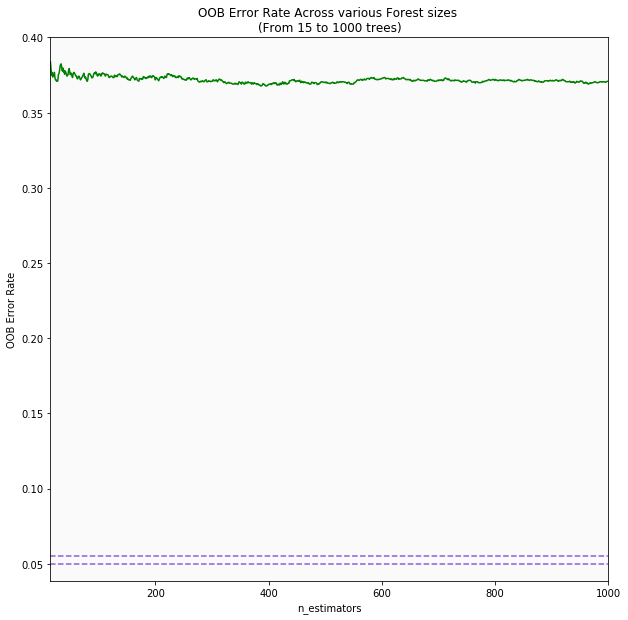

In [120]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',
                color = 'green')
plt.axhline(0.055, 
            color='#875FDB',
           linestyle='--')
plt.axhline(0.05, 
            color='#875FDB',
           linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 15 to 1000 trees)')

In [121]:
fit_rf.set_params(criterion = 'gini',max_features = 'auto',max_depth = 4)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=4, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=True, random_state=42, verbose=0,
                       warm_start=True)

In [122]:
fit_rf.fit(training_set, class_set)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=4, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=True, random_state=42, verbose=0,
                       warm_start=True)